<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="Rossum"></p>

<h1 style="text-align: center;">Deep Learning<br><br>Image Classification with CNN<br><br>Cat-Dog Classification Project<br><h1>

# Dataset Info

The Dogs vs. Cats dataset is a common computer vision dataset in which pictures are classified as either including a dog or a cat.

After the dataset is well studied, it can be used to understand and practice how to design, evaluate, and apply convolutional neural networks for image classification.

You will build a classifier with images and try to detect dogs versus cats using CNN.

Train set includes 12500 cat-5026 dog images, validation set includes 1219 cat-1071 dog images and test set includes 6897 cat and dogs images together.

# Import Libraries and Export Images from Zip_File

In [66]:
try:
    import jupyter_black
    jupyter_black.load()
except ImportError:
    print("You can safely ignore this message.")

You can safely ignore this message.


In [67]:
import os

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "1"

In [68]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread

#import warnings
#warnings.filterwarnings("ignore")
#warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [69]:
from tensorflow.keras.backend import clear_session
# Clear the session
clear_session()

import zipfile

# Unzip the file
zip_ref = zipfile.ZipFile(r"C:\Users\nurda\Downloads\cat_dog_data.zip", "r") 
zip_ref.extractall("path_to_extract_to")  # Specify the path where you want to extract the files
zip_ref.close()

In [71]:
# Recognizing and Understanding Data

In [72]:
import zipfile
import os

# Define the path to the ZIP file and the extraction directory
zip_file_path = r"C:\Users\nurda\Downloads\cat_dog_data.zip"
extract_to = r"C:\Users\nurda\Downloads\cat_dog_data"

# Extract the contents of the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

# Check if the directory exists after extraction
if os.path.exists(extract_to):
    print("Extraction successful. Files:")
    print(os.listdir(extract_to))
else:
    print(f"Extraction failed or directory does not exist at {extract_to}.")

Extraction successful. Files:
['data']


In [73]:
my_data_dir = "C:\\Users\\nurda\\Downloads\\cat_dog_data"

# List the contents of the base directory
base_contents = os.listdir(my_data_dir)
print(f"Contents of {my_data_dir}: {base_contents}")

# Check if there is a 'data' directory and list its contents
data_dir = os.path.join(my_data_dir, 'data')
if 'data' in base_contents and os.path.isdir(data_dir):
    data_contents = os.listdir(data_dir)
    print(f"Contents of {data_dir}: {data_contents}")
else:
    print("'data' directory not found or it's not a directory.")

Contents of C:\Users\nurda\Downloads\cat_dog_data: ['data']
Contents of C:\Users\nurda\Downloads\cat_dog_data\data: ['test', 'train', 'validation']


In [74]:
train_dir = os.path.join(data_dir, 'train')
validation_dir = os.path.join(data_dir, 'validation')
test_dir = os.path.join(data_dir, 'test')

In [75]:
os.listdir(train_dir)

['cat', 'dog']

In [76]:
os.listdir(validation_dir)

['cat', 'dog']

In [77]:
classes = os.listdir(train_dir)
classes

['cat', 'dog']

In [78]:
import pathlib

data_dir = pathlib.Path(train_dir)  # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
# created a list of class_names from the subdirectories
print(class_names)

['cat' 'dog']


In [79]:
class_names

array(['cat', 'dog'], dtype='<U3')

**Let's check how many images there are.**

In [80]:
os.listdir(os.path.join(train_dir, "cat"))[:5]

['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.1000.jpg']

In [81]:
len(os.listdir(os.path.join(train_dir, "cat"))), len(
    os.listdir(os.path.join(train_dir, "dog"))
)

(12500, 5026)

In [82]:
len(os.listdir(os.path.join(validation_dir, "cat"))), len(
    os.listdir(os.path.join(validation_dir, "dog"))
)

(1219, 1071)

In [83]:
num_test_images = len(os.listdir(test_dir))
num_test_images

6897

In [84]:
# Walk through cell_images directory and list number of files
for dirpath, dirnames, filenames in os.walk(my_data_dir):
    print(
        f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'."
    )

There are 1 directories and 0 images in 'C:\Users\nurda\Downloads\cat_dog_data'.
There are 3 directories and 0 images in 'C:\Users\nurda\Downloads\cat_dog_data\data'.
There are 0 directories and 6897 images in 'C:\Users\nurda\Downloads\cat_dog_data\data\test'.
There are 2 directories and 0 images in 'C:\Users\nurda\Downloads\cat_dog_data\data\train'.
There are 0 directories and 12500 images in 'C:\Users\nurda\Downloads\cat_dog_data\data\train\cat'.
There are 0 directories and 5026 images in 'C:\Users\nurda\Downloads\cat_dog_data\data\train\dog'.
There are 2 directories and 0 images in 'C:\Users\nurda\Downloads\cat_dog_data\data\validation'.
There are 0 directories and 1219 images in 'C:\Users\nurda\Downloads\cat_dog_data\data\validation\cat'.
There are 0 directories and 1071 images in 'C:\Users\nurda\Downloads\cat_dog_data\data\validation\dog'.


**Let's take an example images from both train-cat and train-dog folders to observe process**

In [85]:
# View a random image
import random


def view_random_image(target_dir, target_class):
    """Returns a randomly selected image after displaying it,
    given directory path and class names.
    Args:
        target_dir (str): Relative path to the target directory
        target_class (str): The name of the target class to randomly select a picture from
    Returns:
        img (np.ndarray): Randomly selected image as np.ndarray
    """
    # Setup target directory (we'll view images from here)
    target_folder = os.path.join(target_dir, target_class)

    # Get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)

    # Read in the image and plot it using matplotlib
    img = imread(os.path.join(target_folder, random_image[0]))
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")

    print(f"Image shape: {img.shape}")  # show the shape of the image

    return img

Image shape: (374, 500, 3)


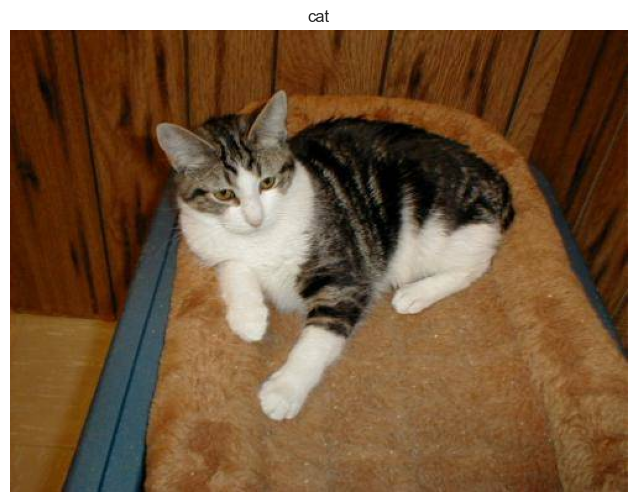

In [86]:
img = view_random_image(target_dir=train_dir, target_class="cat")

Image shape: (399, 367, 3)


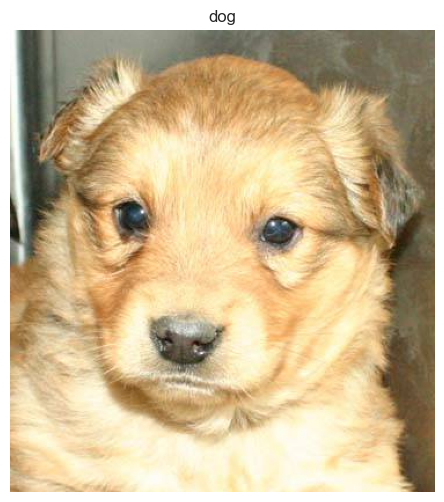

In [91]:
img = view_random_image(target_dir=train_dir, target_class="dog")

Image shape: (400, 266, 3)


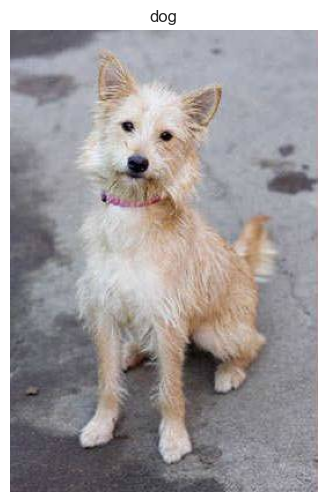

In [92]:
# View a random image from the training dataset
import random

img = view_random_image(
    target_dir=train_dir, target_class=random.choice(class_names)
)  # get a random class name

# Data Preprocessing

## Defining Input Shape

**Let's decide on the final dimension of these images.**

Image shape: (346, 499, 3)


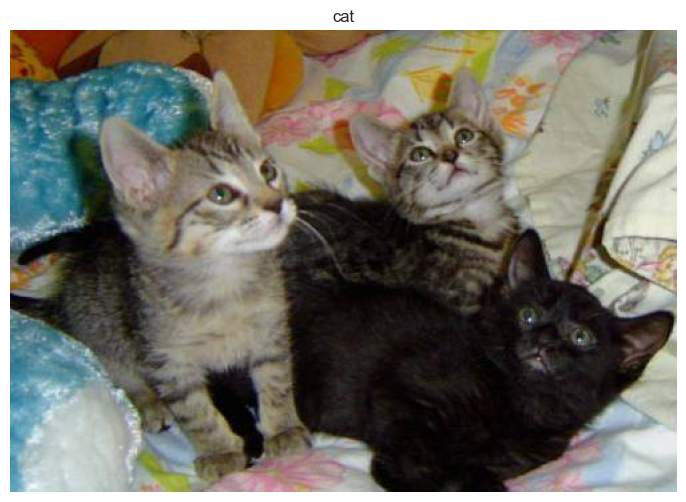

In [50]:
cat_img = view_random_image(train_dir, "cat")

Image shape: (500, 377, 3)


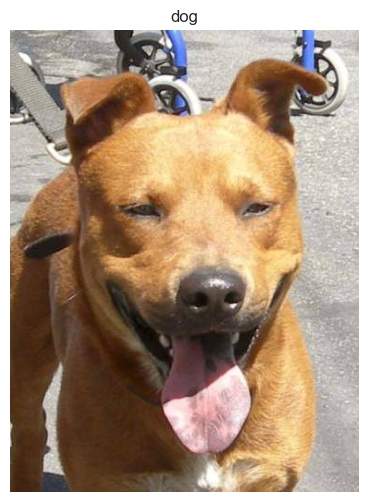

In [51]:
dog_img = view_random_image(train_dir, "dog")

In [93]:
x = [
    imread(os.path.join(train_dir, "cat", image)).shape[0]
    for image in os.listdir(os.path.join(train_dir, "cat"))
    if "Thumbs.db" not in image
]
y = [
    imread(os.path.join(train_dir, "cat", image)).shape[1]
    for image in os.listdir(os.path.join(train_dir, "cat"))
    if "Thumbs.db" not in image
]


In [94]:
x[:5]

[374, 280, 499, 499, 149]

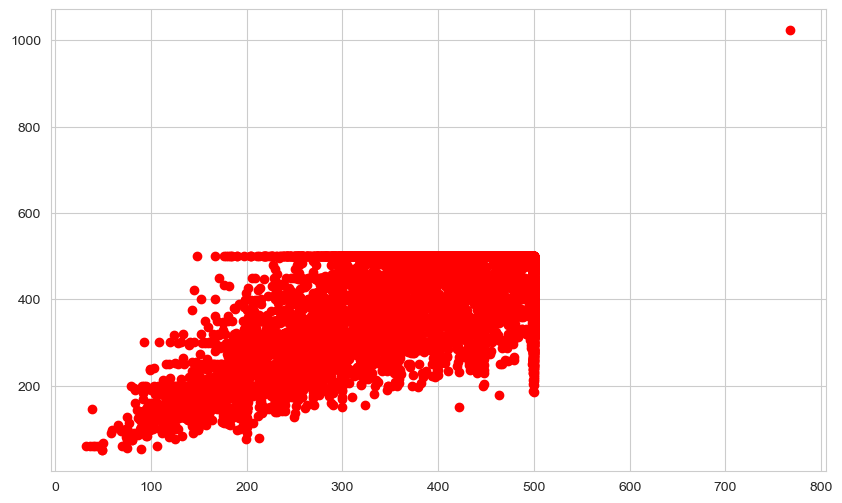

In [95]:
plt.scatter(x, y, color='red')

In [96]:
np.mean(x), np.median(x)

(356.46712, 374.0)

In [97]:
np.mean(y), np.median(y)

(410.52264, 470.0)

In [102]:
x = [
    imread(os.path.join(validation_dir, "cat", image)).shape[0]
    for image in os.listdir(os.path.join(validation_dir, "cat"))
    if "Thumbs.db" not in image
]
y = [
    imread(os.path.join(validation_dir, "cat", image)).shape[1]
    for image in os.listdir(os.path.join(validation_dir, "cat"))
    if "Thumbs.db" not in image
]


In [103]:
np.mean(x), np.median(x)

(355.1821164889254, 374.0)

In [104]:
np.mean(y), np.median(y)

(411.0812141099262, 458.0)

In [98]:
image_shape = (224, 224, 3)

## Scaling

**Let's check the images if they are needed to be scaled or not**

In [99]:
cat_img.max()

255

In [100]:
dog_img.max()

255

## Image Data Generator

**Image Manipulation**

We can use the ImageDataGenerator to manipulate the images with rotation, resizing, and scaling so the model becomes more robust to different images that our data set doesn't have. ImageDataGenerator does the followings.

* Accepts a batch of images used for training.
* Applies a series of random transformations to each image in the batch.
* Replaces the original batch with randomly transformed batch.
* Training the CNN on this randomly transformed batch.

The goal of applying data augmentation is to have a more generalized model.

Data augmentation is a way to try and prevent a model overfitting. If your model is overfiting (e.g. the validation loss keeps increasing), you may want to try using data augmentation.

In [174]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [210]:
train_image_gen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.10,
    height_shift_range=0.10,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode="nearest",
    rescale=1/255  # Normalize pixel values to [0, 1]
)

# Data generator for validation (no augmentation, just rescaling)
validation_image_gen = ImageDataGenerator(
    rescale=1/255  # Normalize pixel values to [0, 1]
)

# Data generator for test (no augmentation, just rescaling)
test_image_gen = ImageDataGenerator(
    rescale=1/255  # Normalize pixel values to [0, 1]
)

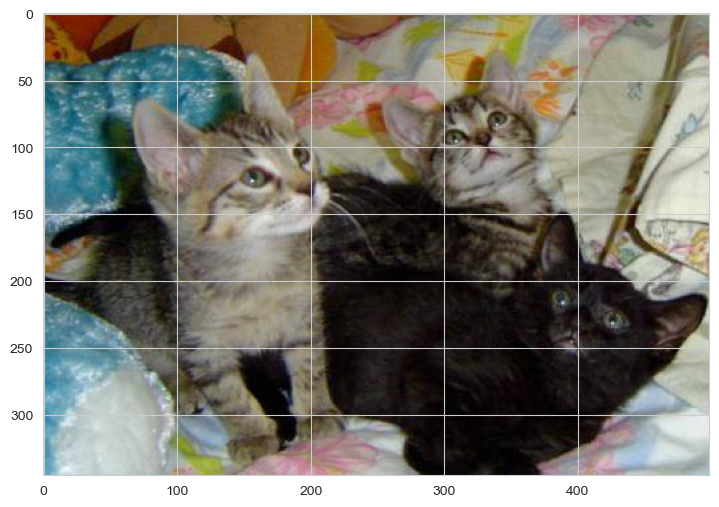

In [211]:
plt.imshow(cat_img);

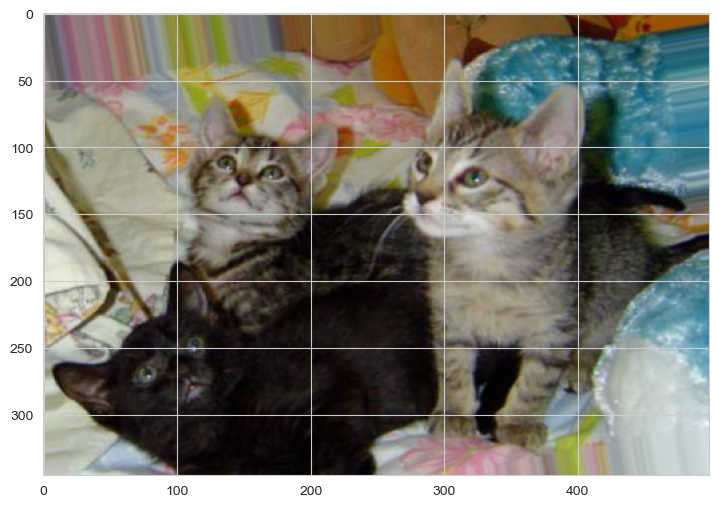

In [212]:
plt.imshow(train_image_gen.random_transform(cat_img));

### Taking the path to a directory & Generating batches of augmented data

flow_from_directory function works with images organized in sub-directories. Your directories should include only one class of images, so one folder per class of images.

In [213]:
train_image_gen.flow_from_directory(train_dir)

Found 17526 images belonging to 2 classes.


In [214]:
validation_image_gen.flow_from_directory(validation_dir)

Found 2290 images belonging to 2 classes.


In [215]:
test_image_gen.flow_from_directory(test_dir)

Found 0 images belonging to 0 classes.


In [216]:
batch_size = 32

In [217]:
image_shape

(224, 224, 3)

In [218]:
train_dir, validation_dir, test_dir

('C:\\Users\\nurda\\Downloads\\cat_dog_data\\data\\train',
 'C:\\Users\\nurda\\Downloads\\cat_dog_data\\data\\validation',
 'C:\\Users\\nurda\\Downloads\\cat_dog_data\\data\\test')

In [219]:
train_image_gen = train_image_gen.flow_from_directory(
    directory=train_dir,
    target_size=image_shape[:2],
    color_mode="rgb",
    batch_size=batch_size,
    class_mode="binary",
    seed=42
)

Found 17526 images belonging to 2 classes.


In [220]:
validation_image_gen = validation_image_gen.flow_from_directory(
    directory=validation_dir,
    target_size=image_shape[:2],
    color_mode="rgb",
    batch_size=batch_size,
    class_mode="binary",
    shuffle=False,
    seed=42
)

Found 2290 images belonging to 2 classes.


In [253]:
test_image_gen = ImageDataGenerator(
    rescale=1/255  # Normalize pixel values to [0, 1]
)
test_image_gen = test_image_gen.flow_from_directory(
    directory=test_dir,
    target_size=image_shape[:2],
    color_mode="rgb",
    batch_size=batch_size,
    class_mode=None,
    shuffle=False,
    seed=42
)

Found 0 images belonging to 0 classes.


In [251]:
print(f"Found {test_generator.samples} images in test set.")

Found 0 images in test set.


In [222]:
train_generator.class_indices

{'cat': 0, 'dog': 1}

In [223]:
validation_generator.class_indices

{'cat': 0, 'dog': 1}

In [224]:
test_generator.class_indices

{}

In [225]:
train_image_gen

In [226]:
train_image_gen[0][0].shape

(32, 224, 224, 3)

In [227]:
train_image_gen[0][0][0].shape

(224, 224, 3)

In [228]:
len(train_image_gen), len(test_image_gen)

(548, 0)

In [229]:
len(train_image_gen) * batch_size, len(test_image_gen) * batch_size

(17536, 0)

In [230]:
# Get a sample of the training data batch
images, labels = train_image_gen.next()  # get the 'next' batch of images/labels
len(images), len(labels)

(32, 32)

In [232]:
images = test_image_gen.next()  # get the 'next' batch of images/labels
len(images)

0

# Modelling

In [233]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Activation,
    Dropout,
    Flatten,
    Dense,
    Conv2D,
    MaxPooling2D,
)
from tensorflow.keras.callbacks import EarlyStopping

In [234]:
model1 = Sequential()

model1.add(
    Conv2D(filters=32, kernel_size=(3, 3), input_shape=image_shape, activation="relu")
)
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(filters=64, kernel_size=(3, 3), activation="relu"))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(filters=64, kernel_size=(3, 3), activation="relu"))
model1.add(MaxPooling2D(pool_size=(2, 2)))


model1.add(Flatten())

model1.add(Dense(128))
model1.add(Activation("relu"))

model1.add(Dropout(0.5))

model1.add(Dense(1))
model1.add(Activation("sigmoid"))

# optimizer = keras.optimizers.Adam(lr=0.01)
model1.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [235]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 64)        0

In [237]:
early_stop = EarlyStopping(monitor="val_loss", mode='min', patience=2, restore_best_weights=True)

In [238]:
model1.fit(
    train_image_gen,
    epochs=15,
    steps_per_epoch=len(train_image_gen),
    validation_data=validation_image_gen,
    validation_steps=len(validation_image_gen),
    callbacks=[early_stop],
    workers=14,  
)

Epoch 1/15
548/548 [==============================] - 701s 1s/step - loss: 0.5874 - accuracy: 0.7206 - val_loss: 0.6207 - val_accuracy: 0.6559
Epoch 2/15
548/548 [==============================] - 677s 1s/step - loss: 0.5104 - accuracy: 0.7610 - val_loss: 0.6448 - val_accuracy: 0.6659
Epoch 3/15
548/548 [==============================] - 661s 1s/step - loss: 0.4636 - accuracy: 0.7883 - val_loss: 0.5184 - val_accuracy: 0.7410
Epoch 4/15
548/548 [==============================] - 647s 1s/step - loss: 0.4350 - accuracy: 0.8079 - val_loss: 0.5311 - val_accuracy: 0.7651
Epoch 5/15
548/548 [==============================] - 8320s 15s/step - loss: 0.4092 - accuracy: 0.8174 - val_loss: 0.5093 - val_accuracy: 0.7755
Epoch 6/15
548/548 [==============================] - 763s 1s/step - loss: 0.3968 - accuracy: 0.8253 - val_loss: 0.4560 - val_accuracy: 0.7878
Epoch 7/15
548/548 [==============================] - 1365s 2s/step - loss: 0.3826 - accuracy: 0.8328 - val_loss: 0.4208 - val_accuracy: 0.8

In [239]:
model1.metrics_names

['loss', 'accuracy']

In [240]:
summary = pd.DataFrame(model1.history.history)
summary.head()

loss  accuracy  val_loss  val_accuracy
0 0.587     0.721     0.621         0.656
1 0.510     0.761     0.645         0.666
2 0.464     0.788     0.518         0.741
3 0.435     0.808     0.531         0.765
4 0.409     0.817     0.509         0.776

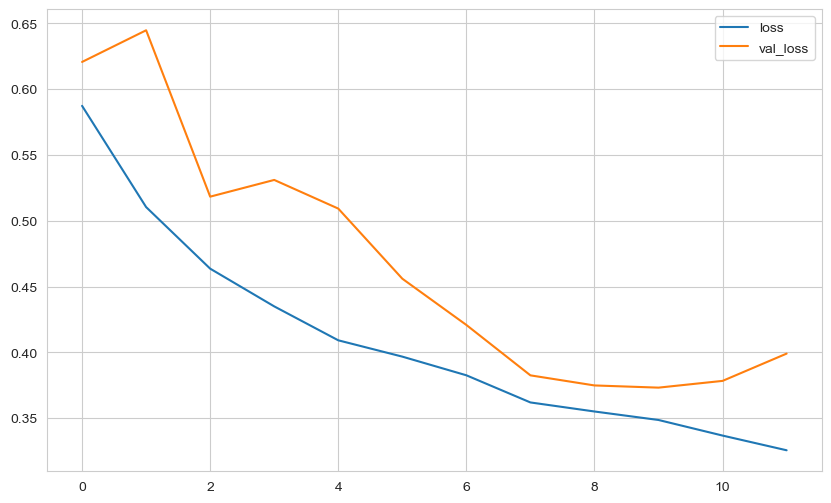

In [241]:
summary[["loss", "val_loss"]].plot();

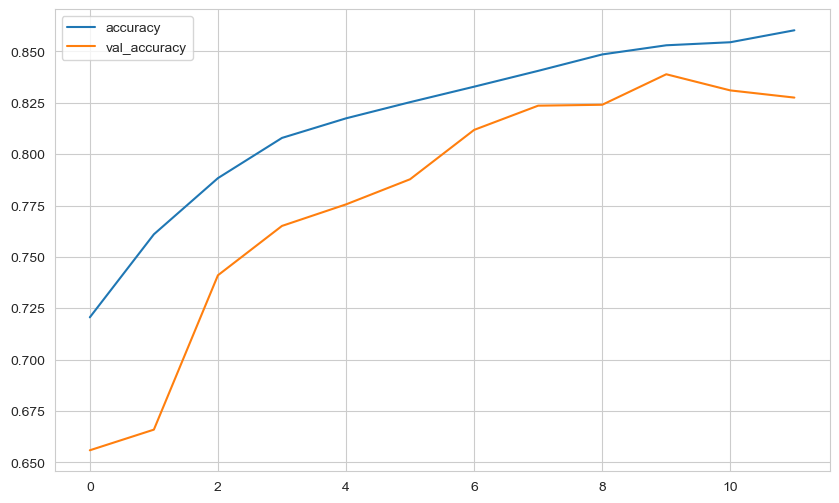

In [242]:
summary[["accuracy", "val_accuracy"]].plot();

# Evaluation on Test Data

In [243]:
from sklearn.metrics import classification_report, confusion_matrix

In [245]:
score = model1.evaluate(validation_image_gen)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

72/72 [==============================] - 16s 217ms/step - loss: 0.3732 - accuracy: 0.8389
Test loss: 0.3732159435749054
Test accuracy: 0.8388646245002747


In [303]:
score = model1.evaluate(validation_image_gen)
print("val loss:", score[0])
print("val accuracy:", score[1])

72/72 [==============================] - 15s 210ms/step - loss: 0.3732 - accuracy: 0.8389
val loss: 0.3732159435749054
val accuracy: 0.8388646245002747


In [250]:
files = os.listdir(test_dir)
print(files)

['10000.jpg', '10001.jpg', '10002.jpg', '10003.jpg', '10004.jpg', '10005.jpg', '10006.jpg', '10007.jpg', '10008.jpg', '10009.jpg', '10010.jpg', '10011.jpg', '10012.jpg', '10013.jpg', '10014.jpg', '10015.jpg', '10016.jpg', '10017.jpg', '10018.jpg', '10019.jpg', '10020.jpg', '10021.jpg', '10022.jpg', '10023.jpg', '10024.jpg', '10025.jpg', '10026.jpg', '10027.jpg', '10028.jpg', '10029.jpg', '10030.jpg', '10031.jpg', '10032.jpg', '10033.jpg', '10034.jpg', '10035.jpg', '10036.jpg', '10037.jpg', '10038.jpg', '10039.jpg', '10040.jpg', '10041.jpg', '10042.jpg', '10043.jpg', '10044.jpg', '10045.jpg', '10046.jpg', '10047.jpg', '10048.jpg', '10049.jpg', '10050.jpg', '10051.jpg', '10052.jpg', '10053.jpg', '10054.jpg', '10055.jpg', '10056.jpg', '10057.jpg', '10058.jpg', '10059.jpg', '10060.jpg', '10061.jpg', '10062.jpg', '10063.jpg', '10064.jpg', '10065.jpg', '10066.jpg', '10067.jpg', '10068.jpg', '10069.jpg', '10070.jpg', '10071.jpg', '10072.jpg', '10073.jpg', '10074.jpg', '10075.jpg', '10076.jpg'

In [255]:
pred_prob = model1.predict(validation_image_gen)

72/72 [==============================] - 16s 212ms/step


In [256]:
pred_prob

array([[0.08254583],
       [0.27033097],
       [0.03858726],
       ...,
       [0.99903125],
       [0.99427515],
       [0.9484167 ]], dtype=float32)

In [257]:
y_pred = pred_prob > 0.5

In [258]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [261]:
y_test = validation_image_gen.classes
y_test

array([0, 0, 0, ..., 1, 1, 1])

In [262]:
print(classification_report(y_test, y_pred, digits=3))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0      0.834     0.870     0.852      1219
           1      0.845     0.803     0.823      1071

    accuracy                          0.839      2290
   macro avg      0.839     0.837     0.838      2290
weighted avg      0.839     0.839     0.839      2290

[[1061  158]
 [ 211  860]]


In [271]:
model1.save("cat_dog_model.h5")

# Prediction

In [268]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [272]:
model = load_model("cat_dog_model.h5")

In [273]:
target_class = random.choice(class_names)
target_class

'dog'

In [307]:
test_dir = 'C:\\Users\\nurda\\Downloads\\cat_dog_data\\data\\test'
classes = os.listdir(test_dir)
print(classes)

['10000.jpg', '10001.jpg', '10002.jpg', '10003.jpg', '10004.jpg', '10005.jpg', '10006.jpg', '10007.jpg', '10008.jpg', '10009.jpg', '10010.jpg', '10011.jpg', '10012.jpg', '10013.jpg', '10014.jpg', '10015.jpg', '10016.jpg', '10017.jpg', '10018.jpg', '10019.jpg', '10020.jpg', '10021.jpg', '10022.jpg', '10023.jpg', '10024.jpg', '10025.jpg', '10026.jpg', '10027.jpg', '10028.jpg', '10029.jpg', '10030.jpg', '10031.jpg', '10032.jpg', '10033.jpg', '10034.jpg', '10035.jpg', '10036.jpg', '10037.jpg', '10038.jpg', '10039.jpg', '10040.jpg', '10041.jpg', '10042.jpg', '10043.jpg', '10044.jpg', '10045.jpg', '10046.jpg', '10047.jpg', '10048.jpg', '10049.jpg', '10050.jpg', '10051.jpg', '10052.jpg', '10053.jpg', '10054.jpg', '10055.jpg', '10056.jpg', '10057.jpg', '10058.jpg', '10059.jpg', '10060.jpg', '10061.jpg', '10062.jpg', '10063.jpg', '10064.jpg', '10065.jpg', '10066.jpg', '10067.jpg', '10068.jpg', '10069.jpg', '10070.jpg', '10071.jpg', '10072.jpg', '10073.jpg', '10074.jpg', '10075.jpg', '10076.jpg'

In [308]:
random_image = random.sample(os.listdir(test_dir), 1)
print(random_image)

['6307.jpg']


In [309]:
random_image = random.sample(os.listdir(test_dir), 1)
random_image_path = os.path.join(test_dir, random_image[0])
print("Random image path:", random_image_path)

Random image path: C:\Users\nurda\Downloads\cat_dog_data\data\test\3576.jpg


In [310]:
image_path = os.path.join(test_dir, target_class, random_image[0])
image_path

'C:\\Users\\nurda\\Downloads\\cat_dog_data\\data\\test\\dog\\3576.jpg'

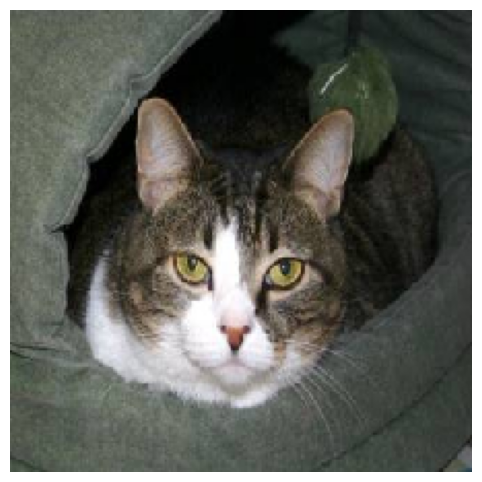

In [312]:
# Load the image
img = image.load_img(random_image_path, target_size=image_shape)

# Convert the image to an array
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Display the image
plt.imshow(img_array[0] / 255)  # Assuming rescaling is required
plt.axis('off')
plt.show()

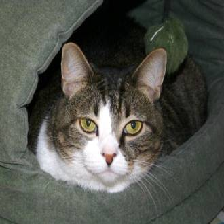

In [313]:
img

In [314]:
type(img)

PIL.Image.Image

In [315]:
img = image.img_to_array(img)

In [316]:
img.shape

(224, 224, 3)

In [317]:
img = np.expand_dims(img, axis=0)

In [318]:
img.shape

(1, 224, 224, 3)

In [319]:
model.predict(img)

1/1 [==============================] - 0s 32ms/step


array([[1.]], dtype=float32)

In [320]:
train_image_gen.class_indices

{'cat': 0, 'dog': 1}

1/1 [==============================] - 0s 39ms/step
Prediction probabilities:  [[0.8346578]]


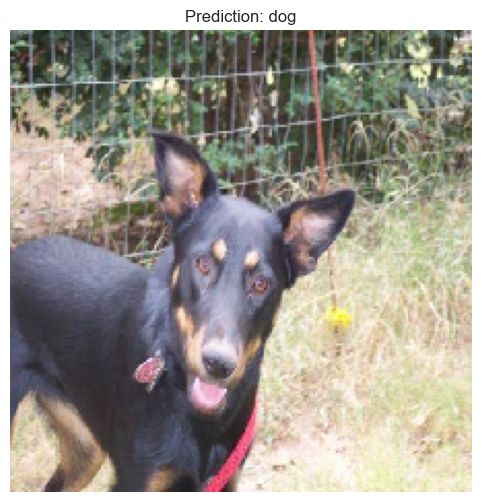

In [321]:


def pred_and_plot(model, img_size, test_dir):
    """
    Imports a random image from the test directory, makes a prediction on it with
    a trained model, and plots the image with the predicted class as the title.
    
    Args:
    - model: Trained model used for making predictions.
    - img_size: Tuple representing the target size for image resizing.
    - test_dir: Directory containing the test images.
    """
    # Get a random image path from the test directory
    random_image = random.sample(os.listdir(test_dir), 1)[0]
    img_path = os.path.join(test_dir, random_image)
    
    # Load the image and preprocess it
    img = image.load_img(img_path, target_size=img_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Normalize to [0, 1]

    # Make a prediction
    pred = model.predict(img_array)
    print("Prediction probabilities: ", pred)

    # Assuming binary classification (e.g., cat and dog)
    # Update the class names to match your model's training data
    class_names = ['cat', 'dog']
    
    if len(pred[0]) > 1:
        # Multi-class classification
        pred_class = class_names[np.argmax(pred)]
    else:
        # Binary classification
        pred_class = class_names[int(np.round(pred[0][0]))]

    # Plot the image and predicted class
    plt.imshow(img)
    plt.title(f"Prediction: {pred_class}")
    plt.axis('off')
    plt.show()

pred_and_plot(model, (224, 224), 'C:\\Users\\nurda\\Downloads\\cat_dog_data\\data\\test')

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="Rossum"></p>